In [ ]:
#Execise 4


1


Check missing values
 Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Verify types

Date <class 'str'>
Open <class 'numpy.float64'>
High <class 'numpy.float64'>
Low <class 'numpy.float64'>
Close <class 'numpy.float64'>
Adj Close <class 'numpy.float64'>
Volume <class 'numpy.float64'>

After cleaning
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Describe
                Open          High           Low         Close     Adj Close  \
count  10118.000000  10118.000000  10118.000000  10118.000000  10118.000000   
mean      10.160287     10.270756     10.048267     10.163447      9.612853   
std       20.235232     20.476322     19.989577     20.242380     19.915597   
min        0.049665      0.049665      0.049107      0.049107      0.038671   
25%        0.272321      0.279018      0.265625      0.272321      0.230952   
50%        0.444196      0.450893  

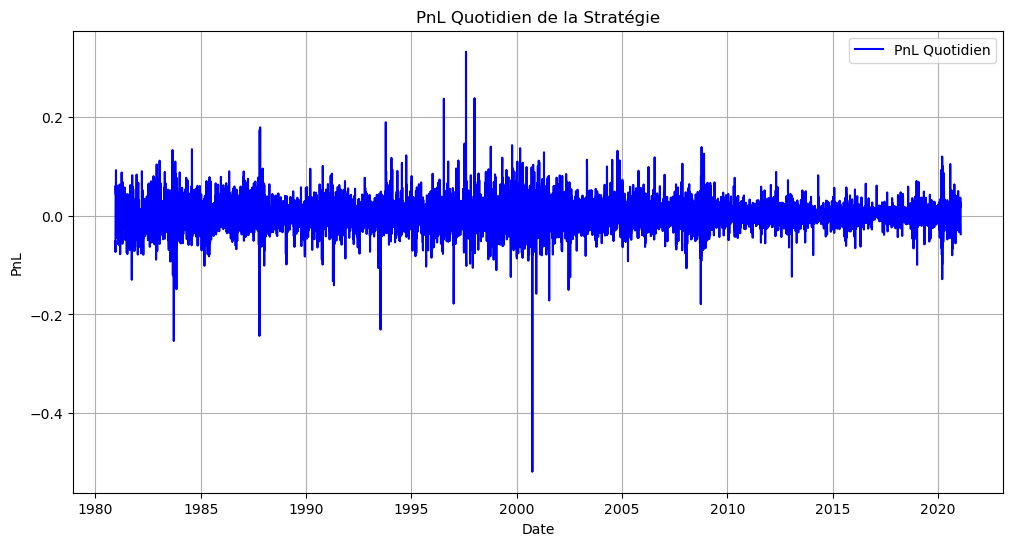

In [7]:
#Exercise 4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1

print("\n1\n")
data =pd.read_csv("./data/AAPL.txt", sep=",")
print("\nCheck missing values\n", data.isna().sum())


print("\nVerify types\n")
for column in data.columns:
   print(column, type(data[column][1]))

#convert to date
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

data.dropna(inplace=True)
print("\nAfter cleaning\n", data.isna().sum())

print("\nDescribe\n", data.describe())

print("\nAnswer\n")
futur_return_adj_close=(data['Adj Close'].shift(-1)-data['Adj Close'])/data['Adj Close']
data['Future Return'] = futur_return_adj_close
print(futur_return_adj_close )

#2
print("\n2\n")

# Créer un signal d'entrée aléatoire

boolean=np.random.randint(0,2,len(data.index))
signal_series=pd.Series(boolean, index=data.index)
print(signal_series)

#3
print("\n3\n")
# Calculer le PnL quotidien
data['Signal'] = signal_series
data['PnL'] = data['Signal'] * data['Future Return']
print(data['PnL'])

#4
print("\n4\n")
# Calculer le PnL total
total_invested = data['Signal'].sum()  # Total investi = nombre de signaux d'achat
total_earned = data['PnL'].sum() + total_invested  # PnL total
strategy_return = (total_earned- total_invested) / total_invested

print(f'Total_earned: {total_earned}')
print(f'Total investi: {total_invested}')
print(f'Rendement de la stratégie: {strategy_return:.2%}')

# print(series)

#5
print("\n5\n")
# Créer un signal d'entrée aléatoire

signal_2=pd.Series(np.ones(len(data.index)), index=data.index)
# print(signal_2)

# Calculer le PnL quotidien
data['Signal'] = signal_2
data['PnL'] = data['Signal'] * data['Future Return']
print(data['PnL'])

# Calculer le PnL total
total_invested = data['Signal'].sum()  # Total investi = nombre de signaux d'achat
total_earned = data['PnL'].sum() + total_invested  # PnL total
strategy_return = (total_earned- total_invested) / total_invested

print(f'\nTotal_earned: {total_earned}')
print(f'Total investi: {total_invested}')
print(f'Rendement de la stratégie: {strategy_return:.2%}')

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PnL'], label='PnL Quotidien', color='blue')
plt.title('PnL Quotidien de la Stratégie')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.legend()
plt.grid()
plt.show()